# -----------------------------librerías extra

In [62]:
using ProgressMeter
using Cubature
using PyPlot

In [63]:
using Graf
using nintegrate

### ----------------------------constantes

### ----------------------------

In [64]:
const hbarr=6.62606957e-34;
const Kb=1.3806488e-23
m=144.42e-27/2;

lambda=1

omegaz =150.0
omegar =lambda*omegaz;

Npart=10.0^7.0;
n=10.0^20.0;
alfa=5.8e-9;
g_alfa=4.0*π*hbarr^2*alfa/m;
omegam=(omegar^2*omegaz)^(1/3);
mu=(hbarr/2) *(2*sqrt(omegar)+omegaz)#0.5*hbarr*omegam*(15*Npart*alfa*sqrt(m*omegam/hbarr))^(2.0/5.0);
c = sqrt(n*g_alfa/m);


#------------Parámetros característicos del solitón bosónico
ksi=1/sqrt(4*pi*n*alfa);
beta=0.0;
algo=11.0

z0=algo*ksi;
gama=1/(sqrt(1-beta^2));

const m = 1.0;
const hbarr = 1.0;
omegaz = 0.05;
omegar = 7.0*omegaz;
n=1.;
alfa=10.0;
g_alfa=4.0*π*alfa;
omegam=(omegar*omegaz)^(1/3);
mu=0.5*omegam*(15*alfa*sqrt(m*omegam))^(2.0/5.0);

c = sqrt(n*g_alfa/m);


# -------------parámetros característicos del solitón bosónico
ksi=0.1;
beta=0.0;
algo=5.0;
z0=algo*ksi;
gama=1/(sqrt(1-beta^2));

### ----Función de onda

In [65]:

function sol(z::Float64)
(tanh((z-z0)/(ksi*gama)))/gama
end

function U(r::Float64,z::Float64)
    (1/2)*m*((omegar*r)^2 + (omegaz*z)^2)
end

function n_tf(r::Float64,z::Float64)            
    if  mu-U(r,z)>0 0
        return (mu-U(r,z))/(n*g_alfa)              
    end
    return 0       
end


function FUNCIONTF0(r::Float64,z::Float64)
    sqrt(n_tf(r,z))*(sol(z)+im*beta)
end

function FUNCIONTF0(v::Vector{Float64})
    FUNCIONTF0(v[1],v[2])
end

FUNCIONTF0 (generic function with 2 methods)

In [85]:
rmax_estatico=sqrt(2*mu/(m*omegar^2))
zmax_estatico=sqrt(2*mu/(m*omegaz^2))


function rmaxintegrar(t::Float64)
    rmax_estatico/sqrt(abs(sin(omegar*t)))
end

function zmaxintegrar(t::Float64)
    zmax_estatico/sqrt(abs(sin(omegaz*t)))
end



rmaxevaluar=5*rmax_estatico;
zmaxevaluar=5*zmax_estatico;


In [86]:
#unidades 0A
EOA=hbarr*omegam;
tOA=1/omegam;
lOA=sqrt(hbarr/(m*omegam));

# El Tiempo

In [88]:
rmaxevaluar/lOA

5.392817714760867

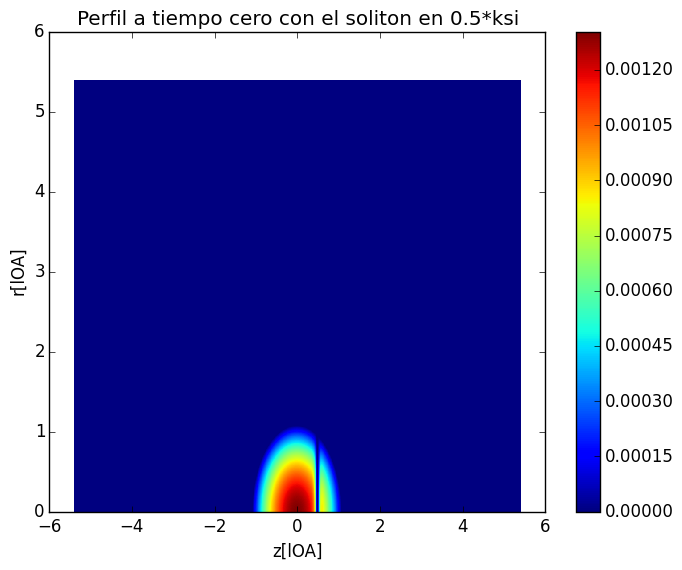

In [100]:
resolucion=1000;

perfilinicial=zeros(resolucion+1,resolucion+1)



function ρ0(r::Float64,z::Float64)
    FUNCIONTF0(r,z) *conj(FUNCIONTF0(r,z))
end

perfilinicial=gencodominio2D([-zmaxevaluar,zmaxevaluar],[0.0,rmaxevaluar],resolucion,ρ0);
grafdensidad([-zmaxevaluar/lOA,zmaxevaluar/lOA],[0.0,rmaxevaluar/lOA],resolucion+1, perfilinicial,"Perfil a tiempo cero con el soliton en $algo*ksi","z[lOA]","r[lOA]","barra")
savefig("Perfil a tiempo cero con lOA=$lOA,z0=$algo*ksi.png")

# ----------------------------------------------------------------------------------------------

# EL TIEMPO

In [ ]:
DT=100;
t1=ksi/c;
t0=tOA/DT;
t1=t1/DT;

In [90]:
rmax_estatico/lOA

1.0785635429521734

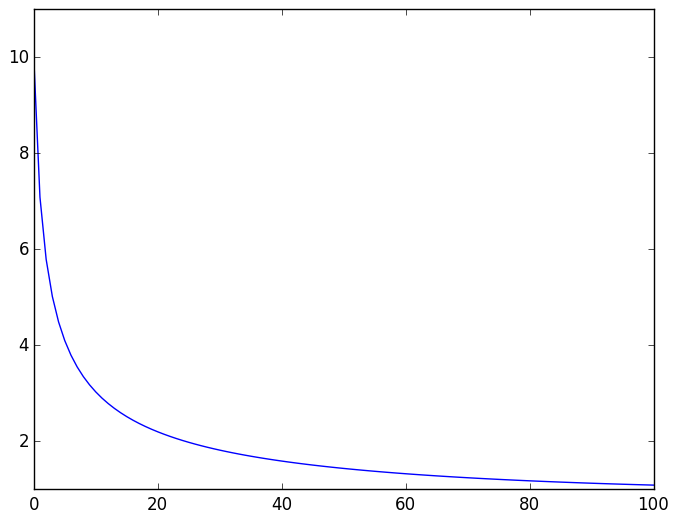

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde064b5390>

In [91]:
tiempos=linspace(tOA/100,tOA,101);
rmax=zeros(101);
zmax=zeros(101);

[rmax[i]=1/sqrt(abs(sin(omegar*tiempos[i]))) for i in 1:101]; 
[zmax[i]=1/sqrt(abs(sin(omegaz*tiempos[i]))) for i in 1:101]; 

PyPlot.plot(rmax)

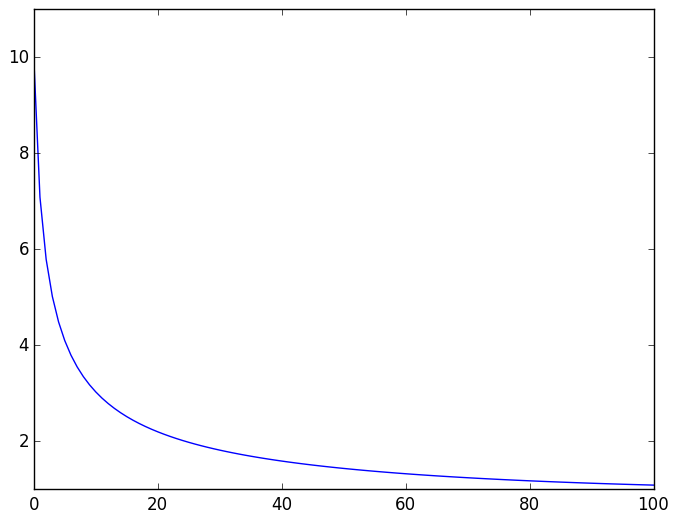

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde0662ae10>

In [92]:
PyPlot.plot(zmax)

# Inspeccionar la función a integrar

In [93]:
#########EN UNIDADES dependientes del tiempo

N_est=(m/hbarr)^(3/2)*omegar*sqrt(omegaz)/sqrt(2*π);


function sol(z::Float64,t)
    tanh((z*sqrt(abs(sin(omegaz*t)))-z0)/(ksi*gama))/gama
end

function fase_rr1(r1::Float64,r::Float64,t::Float64)
    (m*omegar/(2*hbarr))*((r1^2+r^2)*cos(omegar*t))+π/4
end

function fase_zz1(z1::Float64,z::Float64,t::Float64)
    (m*omegaz/(2*hbarr))*((z1^2+z^2)*cos(omegaz*t)-2*z*z1)
end


function Bessel0(r1::Float64,r::Float64)
    besselj0(abs(m*omegar*r*r1/hbarr))
end

function U(r::Float64,z::Float64,t::Float64)
    0.5*(m)*((omegar*r)^2*sin(omegar*t) + (omegaz*z)^2*sin(omegaz*t))
end



function n_tf(r::Float64,z::Float64,t::Float64)            
    if  mu-U(r,z,t)>0 0
        return (mu-U(r,z,t))/(n*g_alfa)              
    end
    return 0       
end


function Rre(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*cos(fase_rr1(r1,r,t))
end


function Rim(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*sin(fase_rr1(r1,r,t))
end


function Zre(z1::Float64,z::Float64,t::Float64)
    cos(fase_zz1(z1,z,t))*sol(z1,t)-beta*sin(fase_zz1(z1,z,t))
end

function Zim(z1::Float64,z::Float64,t::Float64)
    sin(fase_zz1(z1,z,t))*sol(z1,t)+beta*cos(fase_zz1(z1,z,t))
end


function R_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)-Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)
end


function I_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)+Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)
end


R_funcion_a_integrar(v::Vector{Float64},r,z,t)=R_funcion_a_integrar(v[1],v[2],r,z,t)

I_funcion_a_integrar(v::Vector{Float64},r,z,t)=I_funcion_a_integrar(v[1],v[2],r,z,t)


I_funcion_a_integrar (generic function with 2 methods)

In [103]:
methods(grafdensidad)

# 4 methods for generic function "grafdensidad":
grafdensidad(xmap::Array{Float64,1}, ymap::Array{Float64,1}, numero::Int64, f::Function, titulo::ASCIIString, xlab::ASCIIString, ylab::ASCIIString) at /home/ernestoalba/fortran/JULIA/INTEGRALES/Graf.jl:135
grafdensidad(xmap::Array{Float64,1}, ymap::Array{Float64,1}, numero::Int64, f::Function, titulo::ASCIIString, xlab::ASCIIString, ylab::ASCIIString, barraDEcolor) at /home/ernestoalba/fortran/JULIA/INTEGRALES/Graf.jl:118
grafdensidad(xmap::Array{Float64,1}, ymap::Array{Float64,1}, numero::Int64, z::Array{Float64,2}, titulo::ASCIIString, xlab::ASCIIString, ylab::ASCIIString) at /home/ernestoalba/fortran/JULIA/INTEGRALES/Graf.jl:166
grafdensidad(xmap::Array{Float64,1}, ymap::Array{Float64,1}, numero::Int64, z::Array{Float64,2}, titulo::ASCIIString, xlab::ASCIIString, ylab::ASCIIString, barraDEcolor) at /home/ernestoalba/fortran/JULIA/INTEGRALES/Graf.jl:151

In [110]:
typeof("Funcion a integrar a z y r fijas")

ASCIIString

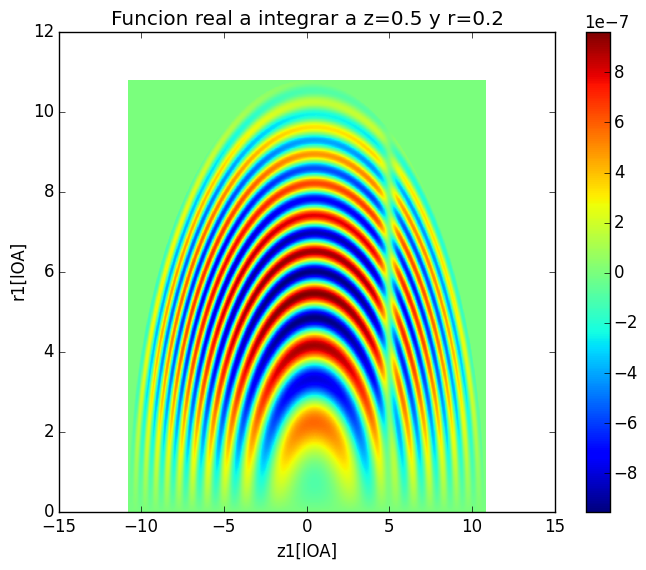

PyObject <matplotlib.colorbar.Colorbar instance at 0x7fde06a31d88>

In [112]:
r=lOA/5;
z=lOA/2;
f1(v)=R_funcion_a_integrar(v,r,z,t0)
zf1=gencodominio2Dvec([-zmaxintegrar(t0),zmaxintegrar(t0)],[0.0,rmaxintegrar(t0)],1000,f1)
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t0)/lOA],1000,zf1,"Funcion real a integrar a z=$(z/lOA) y r=$(r/lOA)","z1[lOA]","r1[lOA]","barra")

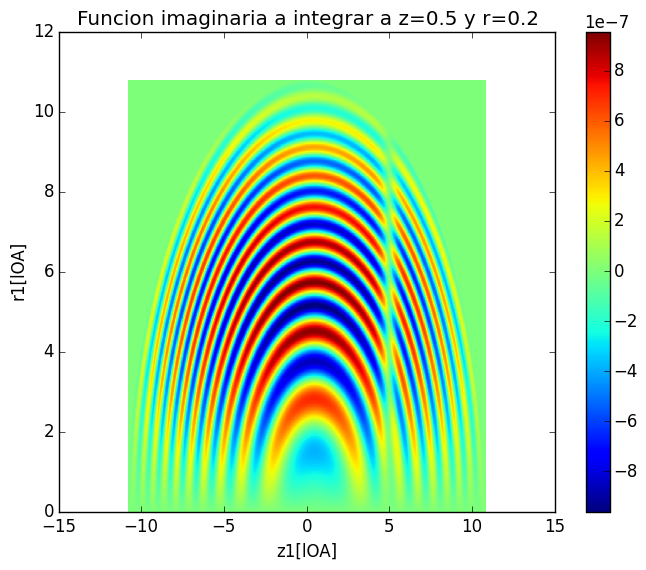

PyObject <matplotlib.colorbar.Colorbar instance at 0x7fde062635f0>

In [113]:
r=lOA/5;
z=lOA/2;
f2(v)=I_funcion_a_integrar(v,r,z,t0)
zf2=gencodominio2Dvec([-zmaxintegrar(t0),zmaxintegrar(t0)],[0.0,rmaxintegrar(t0)],1000,f2)
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t0)/lOA],1000,zf2,"Funcion imaginaria a integrar a z=$(z/lOA) y r=$(r/lOA)","z1[lOA]","r1[lOA]","barra")